In [54]:
#import libraries
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [55]:
#open King County House Data with pandas

kc_housing = pd.read_csv('kc_house_data.csv')

#data size: 21597 rows x 21 columns

In [57]:
kc_housing['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [3]:
#engineer an extra feature
kc_housing['ratio of bedrooms to sqft_living'] = kc_housing['bedrooms']/kc_housing['sqft_living']

In [52]:
kc_housing.sort_values(by='price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,ratio of bedrooms to sqft_living,sqft basement
7245,7700000.0,6,8.00,12050,27600,2.5,4,13,8570,1910,98102,3940,8800,0.000498,3480
3910,7060000.0,5,4.50,10040,37325,2.0,3,11,7680,1940,98004,3930,25449,0.000498,2360
9245,6890000.0,6,7.75,9890,31374,2.0,3,13,8860,2001,98039,4540,42730,0.000607,1030
4407,5570000.0,5,5.75,9200,35069,2.0,3,13,6200,2001,98039,3560,24345,0.000543,3000
1446,5350000.0,5,5.00,8000,23985,2.0,3,12,6720,2009,98004,4600,21750,0.000625,1280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,82500.0,2,1.00,520,22334,1.0,2,5,520,1951,98168,1572,10570,0.003846,0
8267,82000.0,3,1.00,860,10426,1.0,3,6,860,1954,98146,1140,11250,0.003488,0
16184,81000.0,2,1.00,730,9975,1.0,1,5,730,1943,98168,860,9000,0.002740,0
465,80000.0,1,0.75,430,5050,1.0,2,4,430,1912,98014,1200,7500,0.002326,0


In [41]:
kc_housing['sqft_living'].describe()


count    21596.000000
mean      2080.394101
std        918.065981
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [5]:
#create a new column for sqft basement 
kc_housing['sqft basement'] = kc_housing['sqft_living']-kc_housing['sqft_above']

In [6]:
#drop one data point for house with grade 3 because that is the only grade 3 ouse in the whole dataset
indexNames = kc_housing[ kc_housing['grade'] == 3 ].index

kc_housing.drop(indexNames , inplace=True)

In [7]:
#drop columns that we will not use in our data analysis
kc_housing = kc_housing.drop(columns = ['id','date','lat', 'long', 'view','waterfront', 'yr_renovated', 'sqft_basement'])

In [8]:
#drop Nan values
kc_housing = kc_housing.dropna()

count      21596.000000
mean      540309.459993
std       367371.764469
min        78000.000000
25%       322000.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Sale Price')]

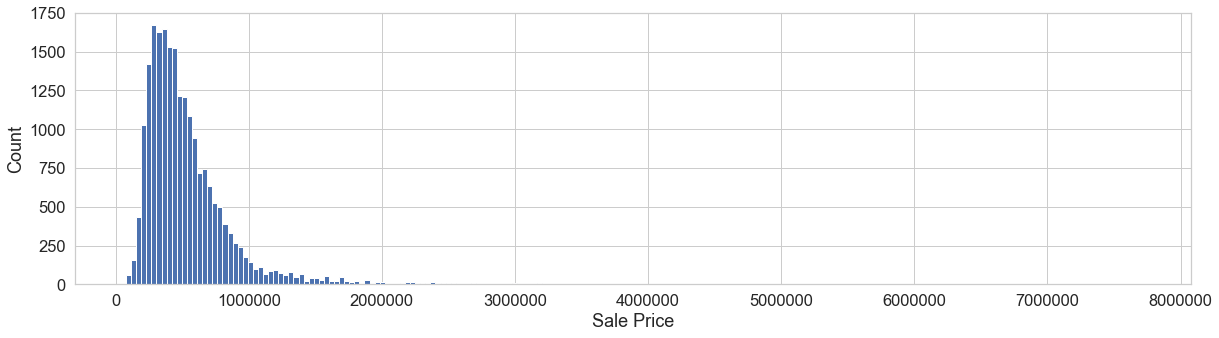

In [9]:
#the next 5 rows will be used to create visualizations for EDA
#plot the distribution of price 
print(kc_housing["price"].describe().apply(lambda x: format(x, 'f')))
sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [20, 5]})
sns.distplot(
    kc_housing['price'], norm_hist=False, kde=False, bins=200, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count')

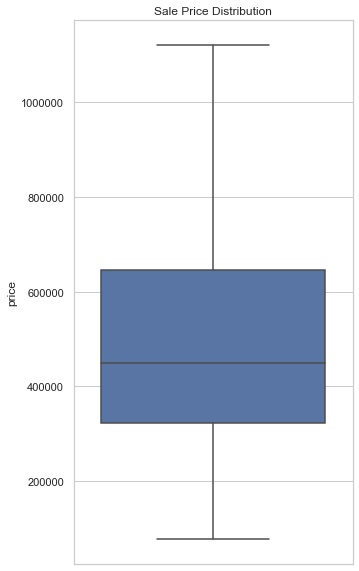

In [10]:
#create a whisker plot without outliers 
sns.set(style="whitegrid")
plt.figure(figsize=(5, 10))
ax = sns.boxplot(y=kc_housing["price"],showfliers=False)
plt.title("Sale Price Distribution")
ax 

[Text(0.5, 0, '')]

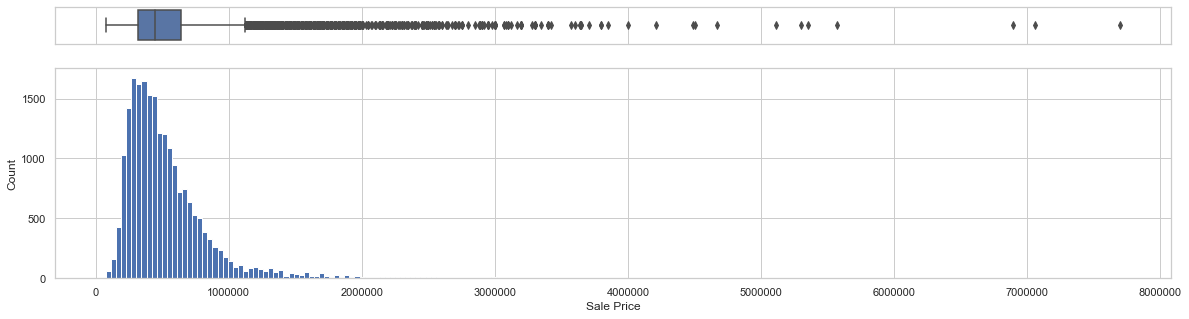

In [11]:
# Create a histogram-boxwhisker of price distribution:
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# Add a graph in each part
sns.boxplot(kc_housing["price"], ax=ax_box)
sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [20, 5]})
sns.distplot(
    kc_housing['price'], norm_hist=False, kde=False, bins=200, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count')
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
#plt.savefig("house_price_dist.png")

([<matplotlib.axis.XTick at 0x1c22ccb990>,
 <a list of 8 Text xticklabel objects>)

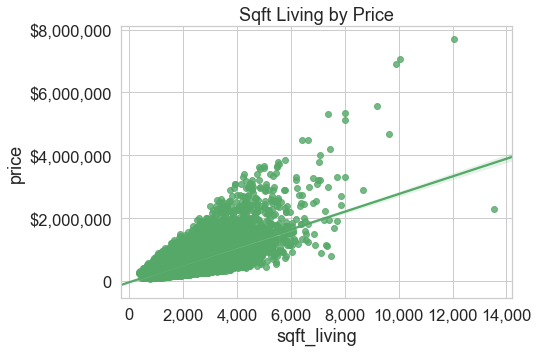

In [12]:
#create a regression plot for sqft living vs price
sqft_living = kc_housing['sqft_living']
price = kc_housing['price']/1000000
sqftliving = pd.DataFrame(kc_housing, columns = ['sqft_living', 'price'])
sns.set(style='whitegrid', palette="deep", font_scale=1.5, rc={"figure.figsize": [7, 5]})
sns.regplot(x= sqft_living, y=price, data=sqftliving, color="g").set_title('Sqft Living by Price')


plt.yticks([0, 2, 4, 6, 8], ['0', '$2,000,000', '$4,000,000', '$6,000,000', '$8,000,000'])
plt.xticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000], ['0', '2,000', '4,000', '6,000', '8,000', '10,000', '12,000', '14,000'])

# plt.savefig("sqft_price.png")

([<matplotlib.axis.YTick at 0x1c2307ce10>,
 <a list of 5 Text yticklabel objects>)

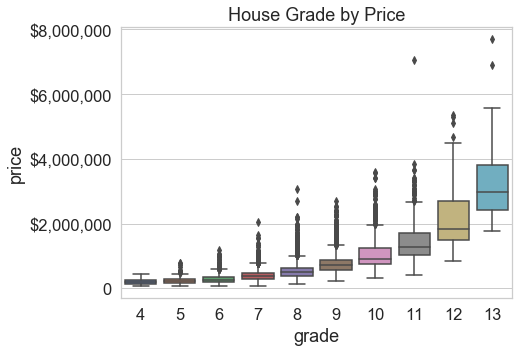

In [13]:
#whisker plot of price distribution among the different grades
grade = kc_housing['grade']
price= kc_housing['price']/1000000
grade_df = pd.DataFrame(kc_housing, columns = ['grade', 'price'])
sns.boxplot(x= grade, y=price, data=grade_df).set_title('House Grade by Price')

plt.yticks([0, 2, 4, 6, 8], ['0', '$2,000,000', '$4,000,000', '$6,000,000', '$8,000,000'])

#plt.savefig("grade_price.png")

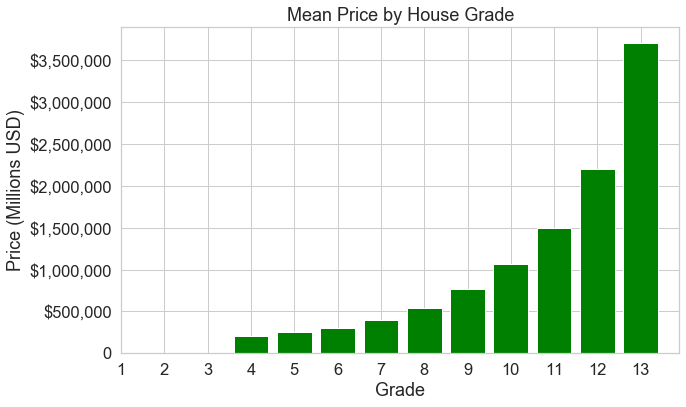

In [14]:
freq_grade = kc_housing['grade'].value_counts()
freq_grade_list = list(freq_grade.head(13).keys())

main_df_grade = []
for n in freq_grade_list:
    main_df_grade.append(kc_housing.loc[(kc_housing['grade'] == n)])


main_df_grade = pd.concat(main_df_grade)
grade_price = main_df_grade.groupby(kc_housing['grade']).mean()

grade_price = grade_price.sort_values(by='price',ascending=False)
X = grade_price.index
y = grade_price['price']/1000000
fig = plt.figure(figsize=(10, 6))
ax = plt.subplot()

plt.bar(X,y, color = 'green')


plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.yticks([0.00, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], ['0', '$500,000', '$1,000,000', '$1,500,000', '$2,000,000', '$2,500,000', '$3,000,000', '$3,500,000'])

plt.title('Mean Price by House Grade')
plt.xlabel('Grade')
plt.ylabel('Price (Millions USD)')
plt.savefig('Bar_Chart')
plt.show()

#plt.savefig("mean_grade_price.png")

In [15]:
X = kc_housing[['bedrooms', 'bathrooms', 'sqft_living','floors','condition','yr_built', 'zipcode','sqft_living15', 'sqft_lot15','ratio of bedrooms to sqft_living', 'sqft basement']].values
# we will not use grade because we are using zipcode in this model
y = np.log(kc_housing['price'].values)

# Add constants for the intercept term:
Xconst = sm.add_constant(X)

model1 = sm.OLS(y, Xconst, hasconst= True)
multiple_model_fitted1 = model1.fit()


model_summary1 = multiple_model_fitted1.summary()

In [16]:
model_summary1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     2719.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:20:52   Log-Likelihood:                -7402.3
No. Observations:               21596   AIC:                         1.483e+04
Df Residuals:                   21584   BIC:                         1.492e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.2154      4.887     -8.639      0.000     -51.794     -32.637
x1            -0.0253      0.005     -5.172      0.000      -0.035      -0.016
x2             0.1072      0.006     19.491      0.000       0.096       0.118
x3             0.0002   7.46e-06     27.057      0.000       0.000       0.000
x4             0.1568      0.006     26.001      0.000       0.145       0.169
x5             0.0481      0.004     12.254      0.000       0.040       0.056
x6            -0.0045      0.000    -40.886      0.000      -0.005      -0.004
x7             0.0006   4.91e-05     13.049      0.000       0.001       0.001
x8             0.0002   5.45e-06     41.089      0.000       0.000       0.000
x9         -4.337e-07   8.84e-08     -4.904      0.000   -6.07e-07    -2.6e-07
x10          -72.7587      8.586     -8.474      0.000     -89.588     -55.929
x11         5.138e-05   7.16e-06      7.181      0.000    3.74e-05    6.54e-05
==============================================================================
Omnibus:                       69.183   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.635
Skew:                          -0.008   Prob(JB):                     1.26e-20
Kurtosis:                       3.319   Cond. No.                     3.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
y = 'price'
# Note that we excluded price from x_cols.
x_cols = ['bedrooms', 'bathrooms', 'sqft_living','floors','condition','yr_built', 'zipcode','sqft_living15', 'sqft_lot15','ratio of bedrooms to sqft_living', 'sqft basement']
#Define categorical variables
categorical_variables = ['floors', 'condition', 'zipcode']
#bedrooms as categorical will lose relationship

In [18]:
#create dummies for categorical variables
df_ohe = pd.get_dummies(kc_housing[x_cols], columns= categorical_variables, drop_first =True)


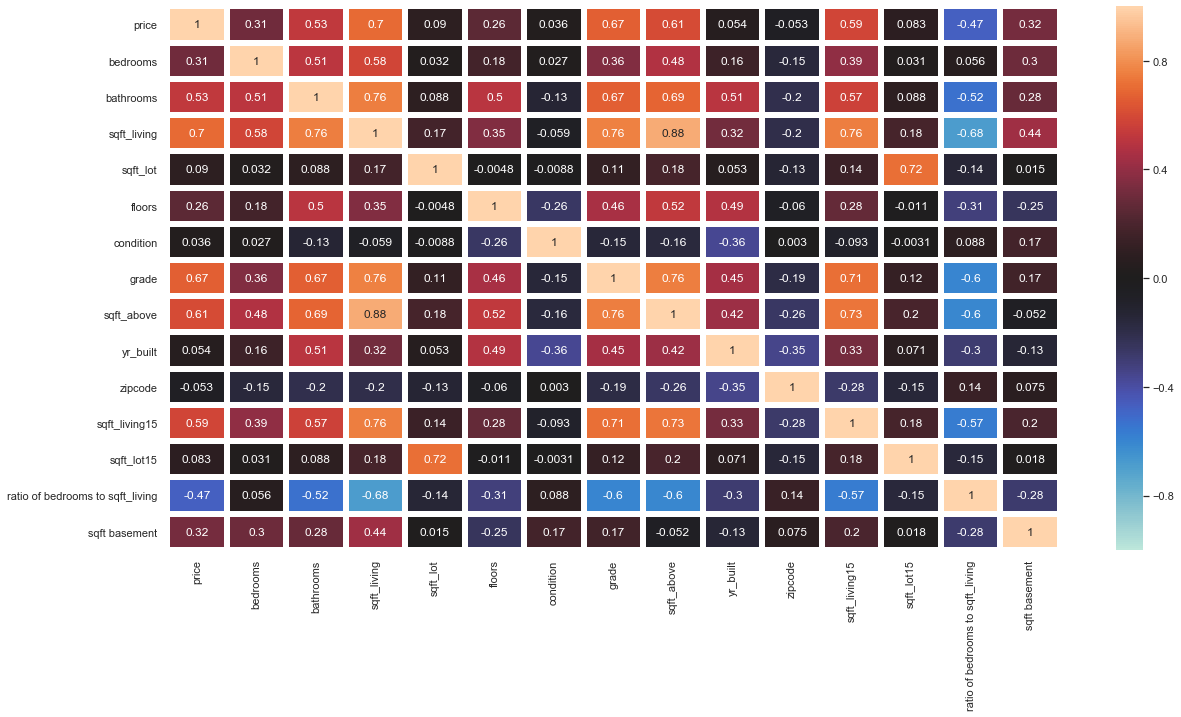

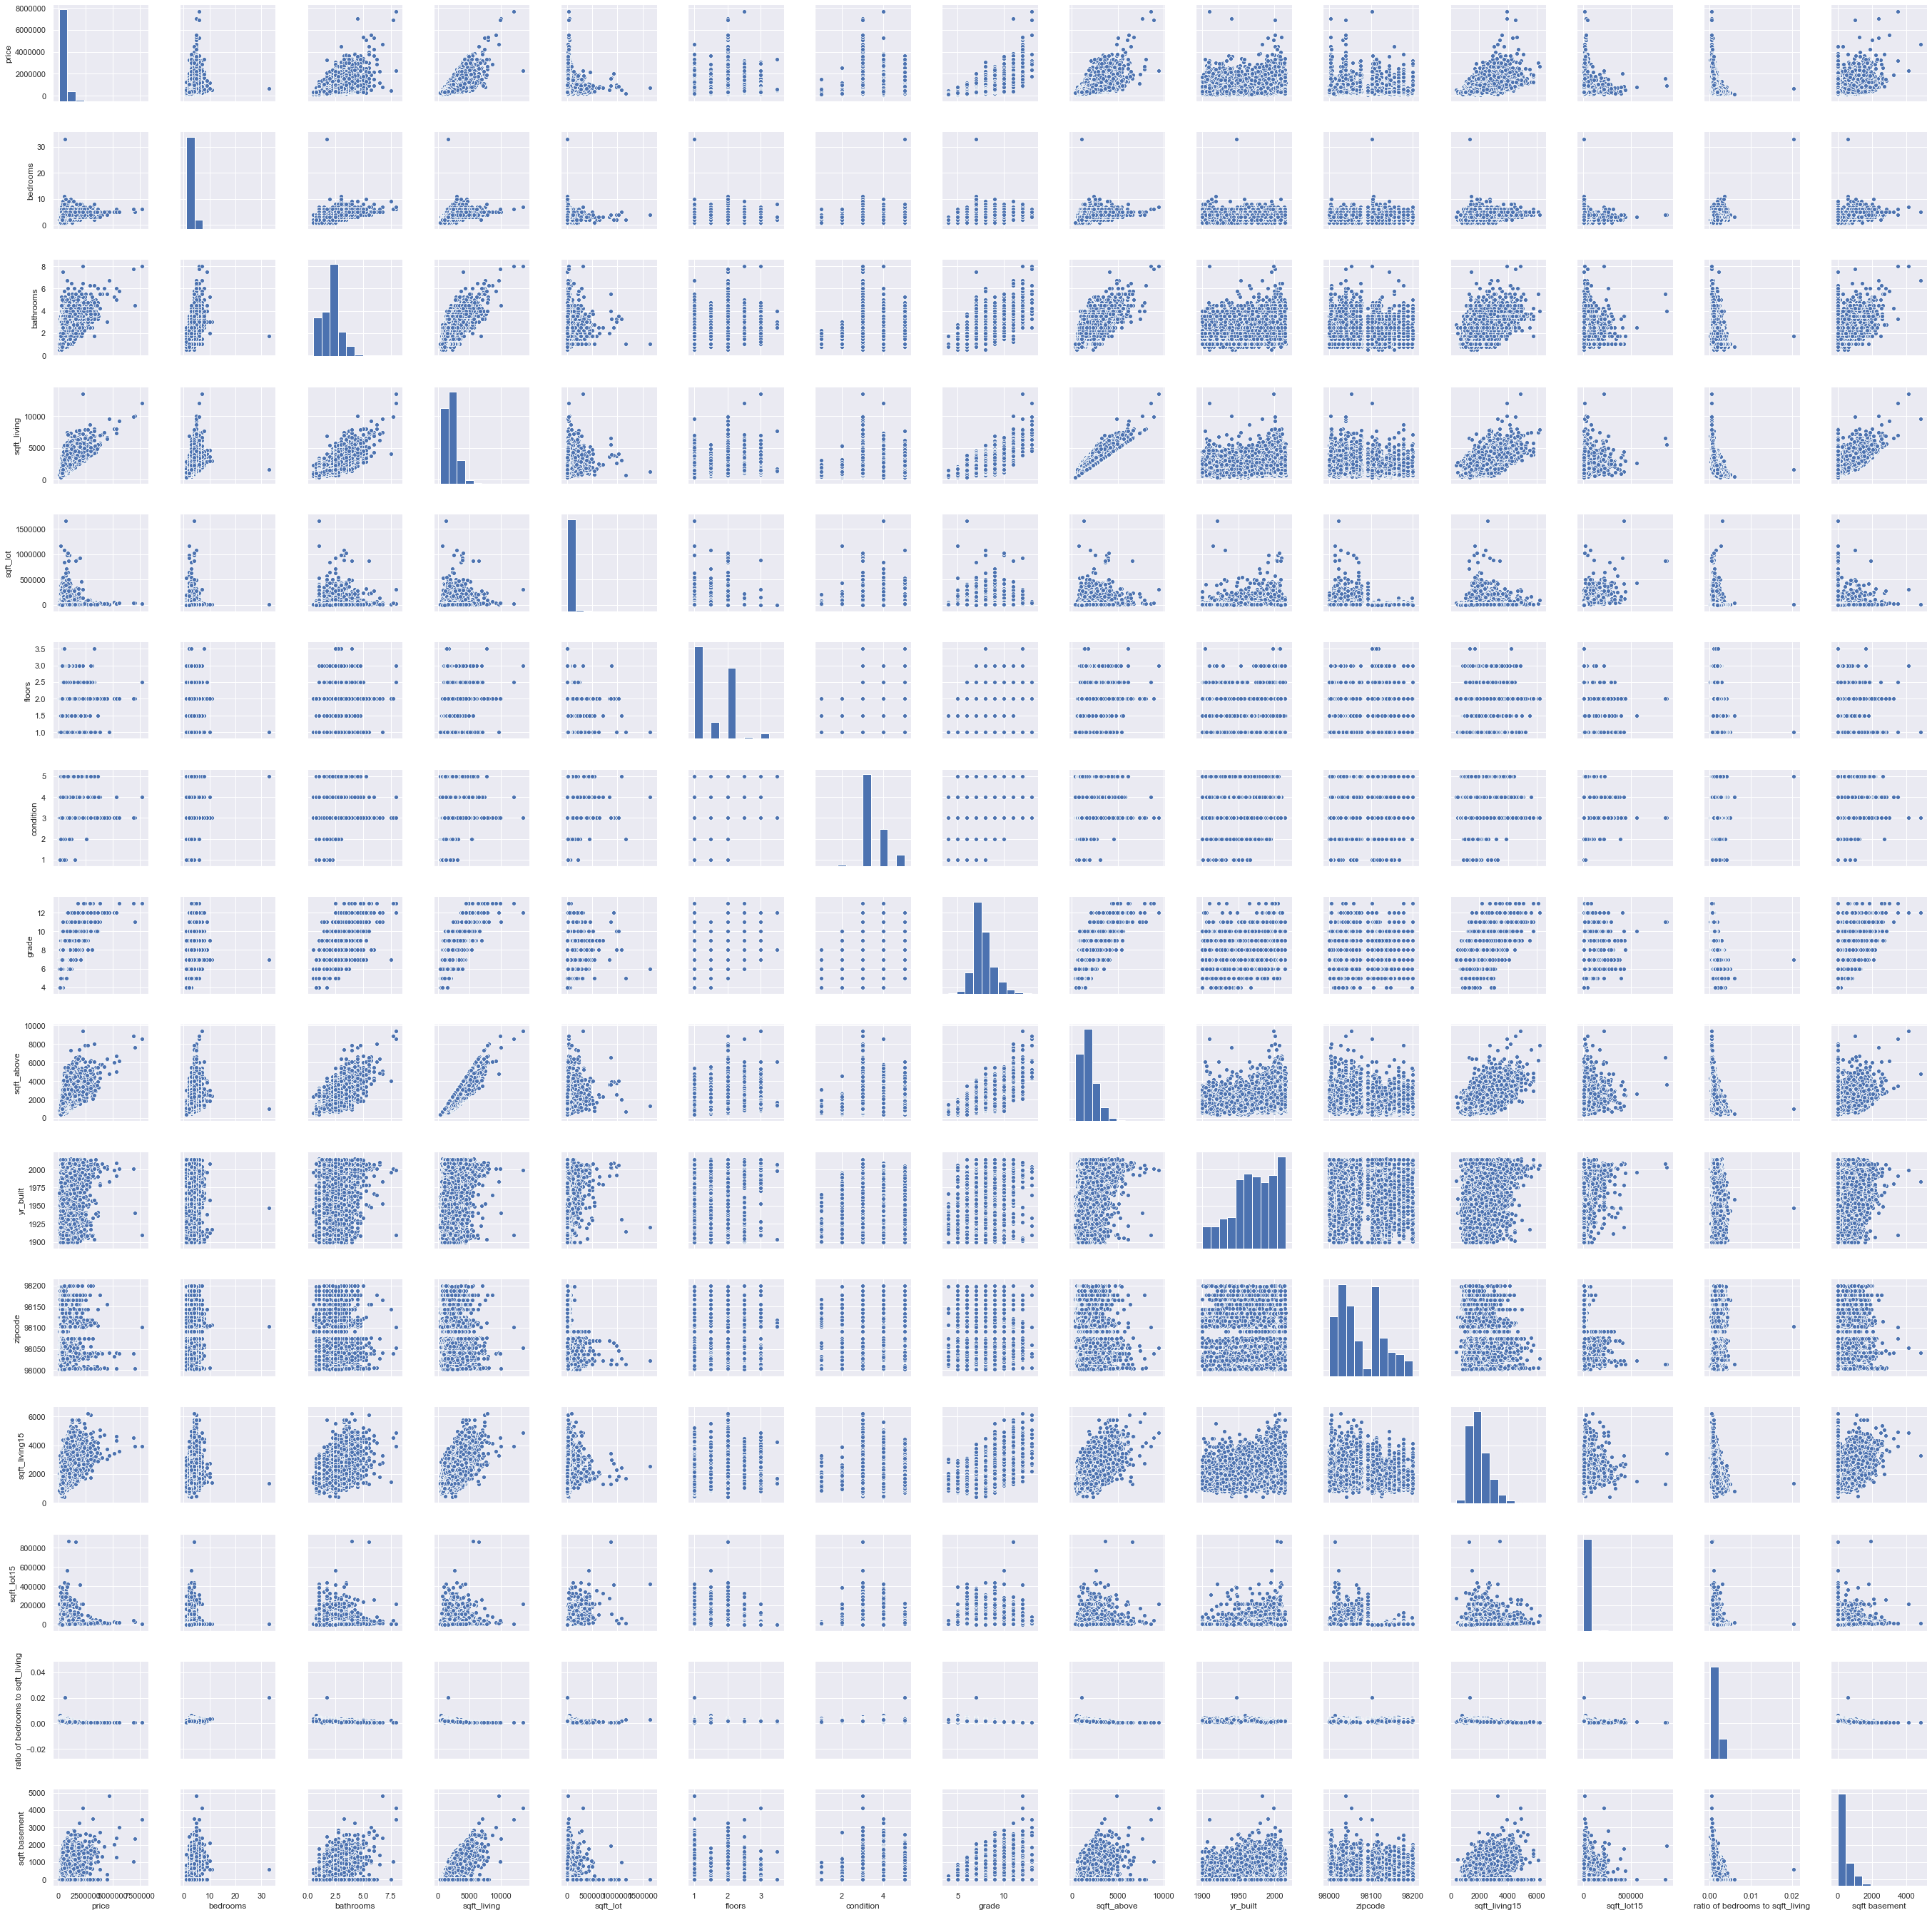

In [19]:
#create heatmap and pairplots to check for correlations
kc_housing_corr = kc_housing.corr()
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.heatmap(kc_housing_corr, center=0, vmin=-1, vmax=1, linewidth = 5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
sns.pairplot(kc_housing)
plt.show()

In [20]:
#print a model summary for our new dataframe df_ohe
X = df_ohe.values
y = np.log(kc_housing['price'].values)

# Add constants for the intercept term:
Xconst = sm.add_constant(X)

model2 = sm.OLS(y, Xconst, hasconst= True)
multiple_model_fitted2 = model2.fit()


model_summary2 = multiple_model_fitted2.summary()

In [21]:
#remove const with p_value>0.05
list_of_const = [4,11,13, 30, 37, 57]
iteration = 0
cleaned_column_list = []
for x in list(df_ohe.columns):
    iteration += 1
    for num in list_of_const:
        if(iteration == num):
            cleaned_column_list.append(x)

In [22]:
#drop columns, from dataframe, that are not statistically significant
df_ohe = df_ohe.drop(columns = cleaned_column_list)

In [23]:
#recheck statsmodel summary

X = df_ohe.values
y = np.log(kc_housing['price'].values)

Xconst = sm.add_constant(X)

model3 = sm.OLS(y, Xconst, hasconst= True)
multiple_model_fitted3 = model3.fit()


model_summary3 = multiple_model_fitted3.summary()

In [24]:
#change df_ohe to a numpy array for training
x_array = df_ohe.to_numpy()


In [25]:
#change housing price serie to a numpy array
y_array = kc_housing['price'].to_numpy()

In [26]:
#create a log version of the price because the price distribution is skewed
y_array_log = np.log(y_array)

In [27]:
#split data into 80% test and 20% train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_array, y_array_log, test_size=0.2, random_state=50)


In [28]:
# To find the best fit line:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

# coefficients (m slope)
m = lr.coef_

# y-intercept b
b = lr.intercept_

In [29]:
#create a list of column names
columns_list = df_ohe.columns

In [30]:
#create an empty dataframe
model_df = pd.DataFrame()

In [31]:
#add column names to the column 'Variables'
model_df['Variables'] = columns_list

In [32]:
#add coefficients to the column 'Coefficients'
model_df['Coefficients'] = m

In [33]:
#add a price factor column 
# we took np.log(price) which is like log_{e}. Do e*coefficients to reverse this
import math
model_df['price factor'] = math.e**(model_df['Coefficients'])

In [34]:
model_df

,Variables,Coefficients,price factor
0,bedrooms,1.733360e-02,1.017485
1,bathrooms,4.992233e-02,1.051189
2,sqft_living,2.246255e-04,1.000225
3,sqft_living15,1.427087e-04,1.000143
4,sqft_lot15,7.144132e-07,1.000001
...,...,...,...
75,zipcode_98177,6.497096e-01,1.914985
76,zipcode_98178,1.910956e-01,1.210575
77,zipcode_98188,1.125362e-01,1.119113
78,zipcode_98198,1.119911e-01,1.118503


In [45]:
sorted_model_df = model_df.sort_values(by='price factor', ascending=True)

In [46]:
sorted_model_df.head(60)

,Variables,Coefficients,price factor
5,ratio of bedrooms to sqft_living,-8.171741e+01,3.240275e-36
9,floors_3.0,-6.976282e-02,9.326150e-01
14,zipcode_98002,-4.557877e-02,9.554443e-01
8,floors_2.0,-1.662731e-02,9.835102e-01
6,sqft basement,-8.985381e-05,9.999102e-01
4,sqft_lot15,7.144132e-07,1.000001e+00
3,sqft_living15,1.427087e-04,1.000143e+00
2,sqft_living,2.246255e-04,1.000225e+00
7,floors_1.5,1.726338e-02,1.017413e+00
0,bedrooms,1.733360e-02,1.017485e+00


In [36]:
#perform a cross validation

from sklearn.model_selection import cross_val_score

cv_5_results  = (cross_val_score(lr, X_train, y_train, cv=5,  scoring='r2'))

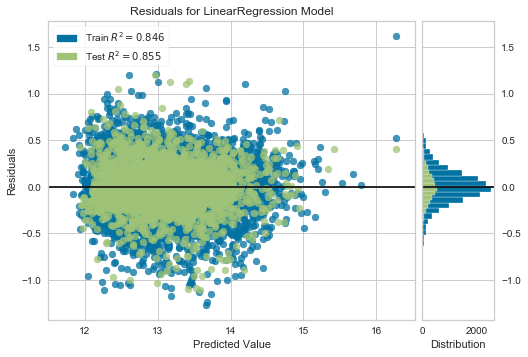

In [37]:
#create a residual map
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot


# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure